In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./Training Data/Train.csv")

In [3]:
arr = df.values

In [4]:
X = arr[:,:5]
Y = arr[:,5]

In [7]:
#Normalization
u = X.mean(axis=0)
std = X.std(axis=0)
X= (X-u)/std

In [15]:
X = np.hstack((np.ones((X.shape[0],1)),X))

In [28]:
def hypothesis(X,thetha):
    Y_ = np.dot(X,thetha)
    return Y_
def error(X,Y,thetha):
    Y_ = hypothesis(X,thetha)
    e = np.sum((Y_-Y)**2)
    m = X.shape[0]
    return e/m
def Gradient(X,Y,thetha):
    Y_ = hypothesis(X,thetha)
    grad = np.dot(X.T,(Y_-Y))
    m = X.shape[0]
    return grad/m
def Gradient_desent(X,Y,max_step =0.1 , Max_loop = 300):
    n= X.shape[1]
    error_list =[]
    thetha = np.zeros((n,))
    for i in range(Max_loop):
        e = error(X,Y,thetha)
        error_list.append(e)
        grad = Gradient(X,Y,thetha)
        thetha = thetha - max_step*grad
    return thetha,error_list
    

In [29]:
thetha,error = Gradient_desent(X,Y)

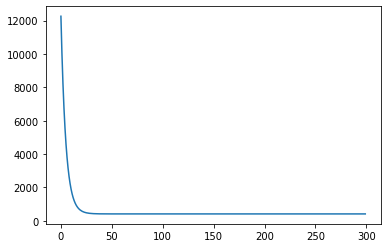

In [30]:
plt.plot(error)
plt.show()

In [31]:
thetha

array([ 0.31883538, 29.59359198, 94.65067706,  8.37544469, 45.52303635,
        2.46461552])

In [32]:
Y_ = hypothesis(X,thetha)

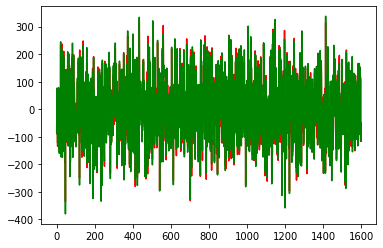

In [36]:
plt.plot(Y_,color = "Red")
plt.plot(Y,color="Green")

In [37]:
X_test = pd.read_csv("./Test/Test.csv")

In [43]:
xnarr = X_test.values
type(xnarr)

numpy.ndarray

In [45]:
xnarr = np.hstack((np.ones((xnarr.shape[0],1)),xnarr))

In [46]:
Y_test = hypothesis(xnarr,thetha)

In [47]:
ans = pd.DataFrame(Y_test)

In [52]:
ans.to_csv("Ans.csv")